<a href="https://colab.research.google.com/github/farbodyadollahi8081/Deep-Learning/blob/main/HW1/Q3/DL2022_HW1_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Farbod Yadollahi
2.   Student Number: 98102595


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [ ]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
data= files.upload()

Saving data01.csv to data01 (1).csv


### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [ ]:
dataset = pd.read_csv("data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test
training_data=dataset.sample(frac=0.8,random_state=42)
testing_data=dataset.drop(training_data.index)
x_train = training_data.X
y_train = training_data.Y
x_test = testing_data.X
y_test = testing_data.Y

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [ ]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
A = np.vstack([x_train, np.ones(len(x_train))]).T
y=np.array(y_train)
m = np.dot(np.linalg.pinv(A),y) #pinv function does the same as inv(A^T A)*A^T
print(m)

[-1.01107853  0.81230591]


In [ ]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = np.square(np.subtract(y_train,predicted_train_y)).mean()
test_error = np.square(np.subtract(y_test,predicted_test_y)).mean()

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.32910926545642
MSE test error: 0.3365156412134214


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

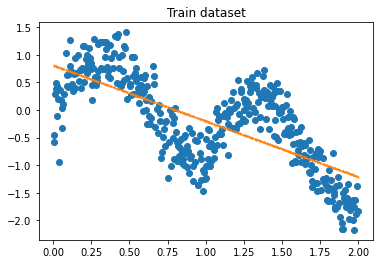

In [ ]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

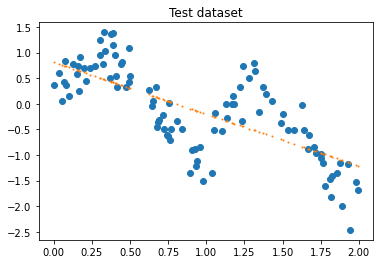

In [ ]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

the MSEs  are acceptable. the ffitted line,though is unacceptable due to the fact that the data is barely linear. a non linear model can better meet the needs. 

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

of cource ues. the locally weighted regression fits multiple lines each fits locally to the data. therefore better piecewise linear model can be fit to the data which resukts in a better performance

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [ ]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
  l = train_dataset.shape[0]
  W = np.mat(np.eye(l))
  for i, xi in enumerate(train_dataset):
    W[i, i] = np.exp(-(np.subtract(xi,the_query_point)*(np.subtract(xi,the_query_point).T))/(2*hyperparameter**2))
  return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [ ]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    train_X=np.mat(np.reshape(np.array(train_X),(l,1)))
    train_Y=np.mat(np.reshape(np.array(train_Y),(l,1)))
    X = np.hstack((train_X,np.ones((l,1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    theta =np.linalg.inv(X.T*W*X)*(X.T*W*train_Y)
    return np.dot(qx,theta)[0,0]

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [ ]:
predicted_test = [predict(x_train, y_train, query, hyperparameter=0.1) for query in x_test]
error =  np.square(np.subtract(y_test,predicted_test)).mean()
print(f"MSE test error: {error}")

MSE test error: 0.10786841458320681


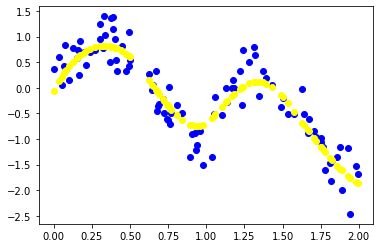

In [ ]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

yes. the MSE proves the betterment. it is much lower than the previous model. in addition the fitted model is much better for the non linear data we have.it predicts tha data well enough and it considers its non linearity

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

it seems that it might better predict the data but it might have some issues related to the error as it considers distance between each test point to its nearest neighbors. due to indexing, its nearest index might not be its nearest neigbor which results in a poor MSE

### Part10:
Implementing the `KNN model`.

In [ ]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.sqrt((x1-x2)**2)
        return distance

    def return_nn_ids(self, x):
        indices = np.argsort([self.distance(x,i) for i in self.X], axis = 0)[:self.k]
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.array([(self.Y[i]) for i in neareest_indices]).mean()
        return predicted_y

In [ ]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error =  np.square(np.subtract(y_test,predicted_y)).mean()
    return error, predicted_y

In [ ]:
k = 10
x_train=np.reshape(np.array(x_train),(x_train.shape[0],1))
y_train=np.reshape(np.array(y_train),(y_train.shape[0],1))
x_test=np.reshape(np.array(x_test),(x_test.shape[0],1))
y_test=np.reshape(np.array(y_test),(y_test.shape[0],1))
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 1.3664865055225666


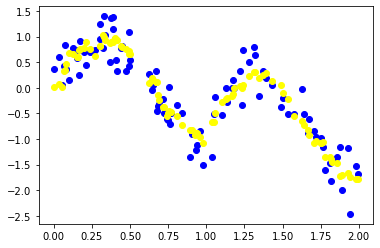

In [ ]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

the plot shows a good prediction of the data, but the accuracy is not that good